
# Linear Discriminant Analysis (LDA)


This is a data-analysis technique, like PCA, that is focused on reducing the dimensions of a dataset. Instead of trying to maximise the variation of datapoints along an axis, we are trying to maximise the separatability of different classes in the dataset. 

It's a Gaussian Maximum-Likelihood Classification Technique. This means each class is assumed to have a gaussian distribution of points, with a mean and variance. Our Eigenvectors are now aligned to maximise variation between classes. 

LDA maximises the separation between classes in two ways:
1. Maximise the difference in mean 
2. Minimise the variation (scatter) within a class.

For two classes: maximise $\frac{(\mu_1 - \mu_2)^2}{s_1^2 + s_2^2}$

When we have more than 2 categories, we find a central point in the data, and maximise the distance of means to that point.

i.e. maximise $\frac{\sum_i d_i^2}{\sum_i s_i^2}$

It's a supervised learning method, so labels for each datapoint are needed when we analyse the data in order to conduct the analysis. For our case, I will be looking at attaching labels to samples in the 0 to 0.5 range, the 0.5 to 2 range, and the 2 to 2.5 range.

Depending on the success of these categories, I will look at changing the ranges to which we attach groups to see if we get better separation. 

A score has been calculated for each run of the process by using the training data as the test data and is the percentage of points that are correctly classed. 

NB: PROBLEMS TO KEEP IN MIND:
WE ASSUME EVERY CLASS HAS THE SAME COVARIANCE MATRIX. FROM ORP WE KNOW THIS IS NOT THE CASE. "It should be mentioned that LDA assumes normal distributed data, features that are statistically independent, and identical covariance matrices for every class. However, this only applies for LDA as a classifier and LDA for dimensionality reduction can also work reasonably well if those assumptions are violated."



### Importing Modules


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pytest import param
from sklearn import linear_model
import scipy
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.gridspec as gridspec
import math
import regressions
import data
from sklearn.model_selection import train_test_split as split
from scipy import linalg
from tqdm import tqdm

np.set_printoptions(precision=2)


## Setup


In [6]:
def LDA_trial(FRC_groups, X, y):
    '''Conduct an LDA analysis using the SciKit Imported LDA function.

    Inputs
        FRC_groups:     [[float]]       a list of length-2 vectors containing the lower and 
                                        upper bounds of each 'class' we are defining
        X:              (NxM) array     input data 
        y:              (Nx1) array     datapoint class assignments

    Outputs
        X:              (NxM) array     normalised input data
        X_r:            (Nx2) array     datapoints projected onto first 2 LDs
        lda:            lda ojbect      contains extractable information on the lda, such as the unit vectors.
    '''
    
    num_groups = len(FRC_groups)
    
    lda = LinearDiscriminantAnalysis(store_covariance=True, priors = [1/num_groups]*num_groups)

    # imported function normalises the data itself.
    X = data.normalise(X)
    lda.fit(X, y)
    X_r = lda.transform(X)

    return X, X_r, lda


def plot_lda(num_groups, X_lda, label_dict, y):
    '''Plots the transformed data onto a space of the 2 most important eigenvectors.
    
    Inputs:
        num_groups:     int             the number of groups we split into
        X_lda           (MxN) array     transformed data array to first two LDs
        label_dict      {int:str}       mapping each class to an identifying name
        y               (Nx1) array     labels for each datapoint
    
    returns plot of the data in the transformed space.
    '''

    ax = plt.subplot(111)
    for label in range(num_groups):
        plt.scatter(x=X_lda[:,0].real[y == label],
                    y=X_lda[:,1].real[y == label],
                    alpha=0.5,
                    label=label_dict[label]
                    )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Projection onto the first 2 linear discriminants')

    plt.grid()
    plt.tight_layout
    plt.show()


def normalise(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm


## Three Groups Plot

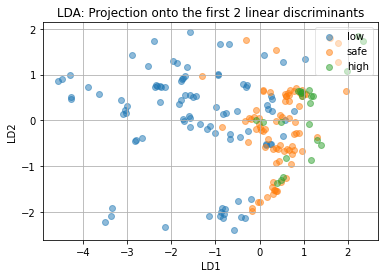

[0.18 0.29 0.94]
corr: 0.7322465327359408


In [10]:
parameters = ['Conductivity', 'pH', 'ORP']
dimension = len(parameters)
chosen_sets = data.all_files
FRC_groups = [[0,0.5], [0.5, 2], [2, 2.5]]

X_prime, X, y, FRC = data.form_data_LDA(chosen_sets, dimension, parameters, FRC_groups)
X_norm, X_r, lda = LDA_trial(FRC_groups, X,y)
label_dict = {0: 'low', 1: 'safe', 2: 'high'}
plot_lda(3, X_r, label_dict, y)

scalings = lda.scalings_

evec1 = scalings[:,0]

print(normalise(evec1))

X0 = data.normalise(X_prime)
FRC = X0[:,0]
X = X0[:, 1:]

X_new = np.matmul(X_norm, evec1)
corr = np.corrcoef(FRC, X_new)[0,1]
print('corr: {}'.format(corr))


## Two Groups Plot


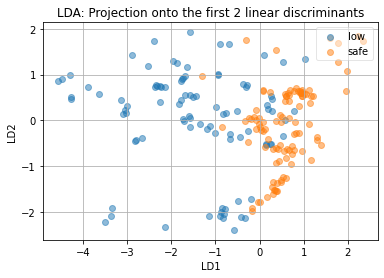

[0.13 0.25 0.96]
corr: 0.7330329541862428


In [13]:
parameters = ['Conductivity', 'pH', 'ORP']
dimension = len(parameters)
chosen_sets = data.all_files
FRC_groups = [[0,0.5], [0.5, 2.5]]

X_prime, X, y2, FRC = data.form_data_LDA(chosen_sets, dimension, parameters, FRC_groups)
X_norm, X_r2, lda2 = LDA_trial(FRC_groups, X,y2)
label_dict = {0: 'low', 1: 'safe'}
plot_lda(2, X_r, label_dict, y2)

scalings = lda2.scalings_

evec1 = scalings[:,0]

print(normalise(evec1))

X0 = data.normalise(X_prime)
FRC = X0[:,0]
X = X0[:, 1:]

X_new = np.matmul(X_norm, evec1)
corr = np.corrcoef(FRC, X_new)[0,1]
print('corr: {}'.format(corr))


## Scoring Runs

In [15]:
parameters = ['Conductivity', 'pH', 'ORP']
dimension = len(parameters)
chosen_sets = data.all_files
three_groups = [[0,0.5], [0.5, 2], [2, 2.5]]
two_groups = [[0,0.5], [0.5,2.5]]

X_prime, X2, y2, FRC = data.form_data_LDA(chosen_sets, dimension, parameters, two_groups)
X_prime, X3, y3, FRC = data.form_data_LDA(chosen_sets, dimension, parameters, three_groups)


corrs_3 = []
scores_3 = []
evecs_3 = np.zeros(dimension)

corrs_2 = []
scores_2 = []
evecs_2 = np.zeros(dimension)


for i in tqdm(range(50)):
    X_train2, X_test2, y_train2, y_test2 = split(X2, y2, test_size=0.2, random_state=i)
    X_train3, X_test3, y_train3, y_test3 = split(X3, y3, test_size=0.2, random_state=i)
    

    X_norm, X_r2, lda2 = LDA_trial(two_groups, X_train2, y_train2)
    X_norm, X_r3, lda3 = LDA_trial(three_groups, X_train3, y_train3)

    score3 = lda3.score(data.normalise(X_test3), y_test3, sample_weight=None)

    score2 = lda2.score(data.normalise(X_test2), y_test2, sample_weight=None)

    evec3 = lda3.scalings_[:,0]
    evecs_3 += np.absolute(evec3)

    evec2 = lda2.scalings_.flatten()
    evecs_2 += np.absolute(evec2)

    X_prime_train, X_prime_test, FRC_train, FRC_test = split(X_prime, FRC, test_size=0.2, random_state=i)
    

    X_new3 = np.matmul(X_test3, evec3)
    corr3 = np.corrcoef(FRC_test, X_new3)[0,1]

    X_new2 = np.matmul(X_test2, evec2)
    corr2 = np.corrcoef(FRC_test, X_new2)[0,1]
    
    scores_3.append(score3)
    corrs_3.append(np.absolute(corr3))

    scores_2.append(score2)
    corrs_2.append(np.absolute(corr2))

evec3 = normalise(evecs_3/50)
evec2 = normalise(evecs_2/50)

print('correlation for 3 classes: {}'.format(np.mean(corrs_3)))
print('score for 3 classes: {}'.format(np.mean(scores_3)))
print('weightings for 3 classes: {}'.format(evec3))

print('correlation for 2 classes: {}'.format(np.mean(corrs_2)))
print('score for 2 classes: {}'.format(np.mean(scores_2)))
print('weightings for 2 classes: {}'.format(evec2))

100%|██████████| 50/50 [00:00<00:00, 177.55it/s]

correlation for 3 classes: 0.7026097029683313
score for 3 classes: 0.659
weightings for 3 classes: [0.18 0.29 0.94]
correlation for 2 classes: 0.7025829614806658
score for 2 classes: 0.8515
weightings for 2 classes: [0.13 0.25 0.96]



# QDA Start


## Setup

In [20]:
def QDA_trial(FRC_groups, X, y):
    '''Conduct a QDA analysis using the SciKit Imported QDA function.

    Inputs:
        FRC_groups:     [[float]]   a list of length-2 vectors containing the lower and 
                                    upper bounds of each 'class' we are defining
        X:              (NxM) array     input data 
        y:              (Nx1) array     datapoint class assignments
    
    returns qda object that contains information on the analysis, such as how to classify points.
    '''
    
    qda = QuadraticDiscriminantAnalysis(store_covariance=True, priors = [1/len(FRC_groups)]*len(FRC_groups))
    qda.fit(X, y)
    
    return qda

def qda_plot(X, X_r, qda2, qda3):
    '''Plot the resulting classifications of the QDA on the linear discriminants found in the 3-class split.
    Inputs
        X:              (NxM) array     normalised input data
        X_r:            (Nx2) array     datapoints projected onto first 2 LDs
        qda2            qda object      object resulting from qda with 2 classes
        qda3            qda object      object resulting from qda with 3 classes
    
    This outputs the described plot.'''

    gs = gridspec.GridSpec(2, 1)
    fig = plt.figure(figsize=(12, 14), dpi=80)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])

    pred_labels3 = ['predict <0.5 FRC', 'predict 0.5-2 FRC', 'predict >2 FRC']
    pred_labels2 = ['predict <0.5 FRC', 'predict >0.5 FRC']

    yhat3 = qda3.predict(X)
    yhat2 = qda2.predict(X)
    
    for i in range(3):
        ax1.scatter(X_r[yhat3 == i, 0], X_r[yhat3 == i, 1], alpha=0.5, label=pred_labels3[i])
    ax1.legend(loc="best", shadow=False, scatterpoints=1)
    ax1.grid()
    ax1.set_xlabel('Previous LD1')
    ax1.set_ylabel('Previous LD2')
    ax1.set_title('(a) QDA 3-Class Split Predictions')

    for i in range(2):
        ax2.scatter(X_r[yhat2 == i, 0], X_r[yhat2 == i, 1], alpha=0.5, label=pred_labels2[i])
    ax2.legend(loc="best", shadow=False, scatterpoints=1)
    ax2.grid()
    ax2.set_xlabel('Previous LD1')
    ax2.set_ylabel('Previous LD2')
    ax2.set_title('(b) QDA 2-Class Split Predictions')
    plt.show()


## Analysis Runs

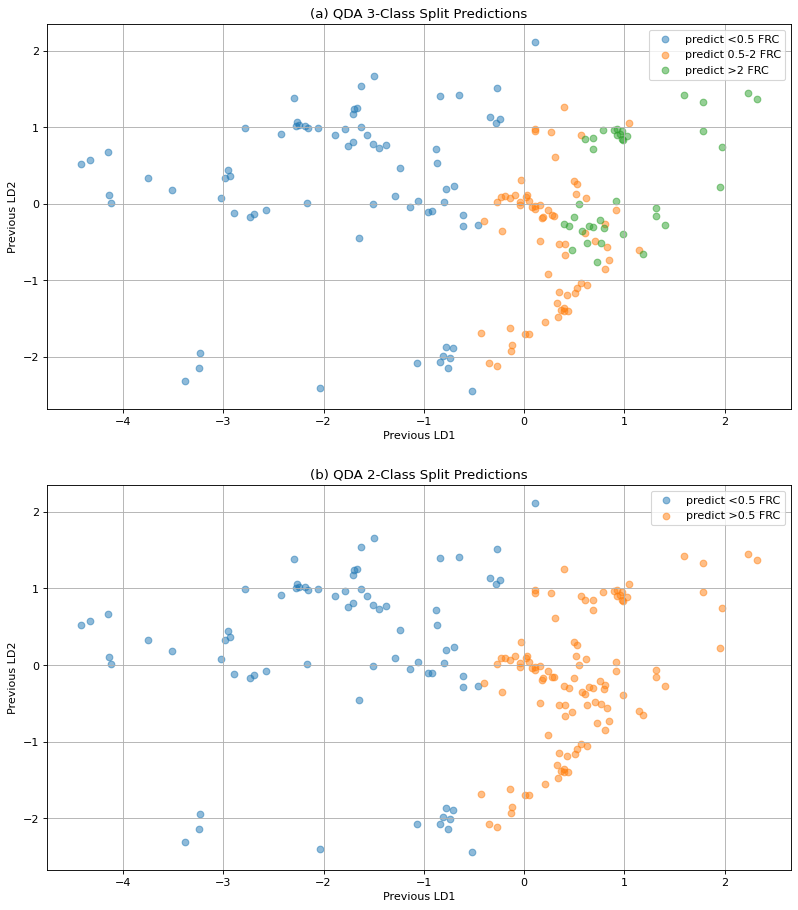

score for 3 class: 0.7094972067039106
score for 2 class: 0.888268156424581


In [21]:
parameters = ['Conductivity', 'pH', 'ORP']
dimension = len(parameters)
chosen_sets = data.non_pool_files
three_groups = [[0,0.5], [0.5, 2], [2, 2.5]]
two_groups = [[0,0.5], [0.5,2.5]]

X_prime, X2, y2, FRC = data.form_data_LDA(chosen_sets, dimension, parameters, two_groups)
X_prime, X3, y3, FRC = data.form_data_LDA(chosen_sets, dimension, parameters, three_groups)

X3 = data.normalise(X3)
X2 = data.normalise(X2)
X_norm, X_r, lda = LDA_trial(three_groups, X3,y3)
qda3 = QDA_trial(three_groups, X3, y3)
qda2 = QDA_trial(two_groups, X2, y2)

qda_plot(X3, X_r, qda2, qda3)
print('score for 3 class: {}'.format(qda3.score(X3, y3)))
print('score for 2 class: {}'.format(qda2.score(X2, y2)))

In [23]:
parameters = ['Conductivity', 'pH', 'ORP']
dimension = len(parameters)
chosen_sets = data.all_files
three_groups = [[0,0.5], [0.5, 2], [2, 2.5]]
two_groups = [[0,0.5], [0.5,2.5]]

scores_3 = []
scores_2 = []

for i in tqdm(range(50)):
    X_train2, X_test2, y_train2, y_test2 = split(X2, y2, test_size=0.2, random_state=i)
    X_train3, X_test3, y_train3, y_test3 = split(X3, y3, test_size=0.2, random_state=i)
    
    qda3 = QDA_trial(three_groups, X_train3, y_train3)
    qda2 = QDA_trial(two_groups, X_train2, y_train2)

    score3 = qda3.score(X_test3, y_test3, sample_weight=None)
    score2 = qda2.score(X_test2, y_test2, sample_weight=None)

    scores_2.append(score2)
    scores_3.append(score3)

print('score for 3 classes: {}'.format(np.mean(scores_3)))
print('score for 2 classes: {}'.format(np.mean(scores_2)))

100%|██████████| 50/50 [00:00<00:00, 237.01it/s]

score for 3 classes: 0.7138888888888889
score for 2 classes: 0.8961111111111112
